# Practical - 12  

## Case Study/Project: Implementation of any real time application using suitable machine learning technique.

# Title:- Customer Churn Analysis and Prediction

## Data Info:
Kaggle: Telco Customer Dataset
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
data=pd.read_csv('C:\\Users\\SVI\\Desktop\\Jupyter NB Codes\\aiml_mini_project\\dataset\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Exploratory Data Analysis

- We see the first 5 records of dataset

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


- How many rows and columns in dataset

In [5]:
data.shape

(7043, 21)

In [6]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
#data types of all columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have 2 types of variables in the dataset: categorical and numerical.
- Out target variable is Churn column
- Note that: TotalCharges is given as object type but it should be float. We will correct this later on.

In [8]:
# the descriptive statistics of numeric variables
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count of TARGET Variable per category')

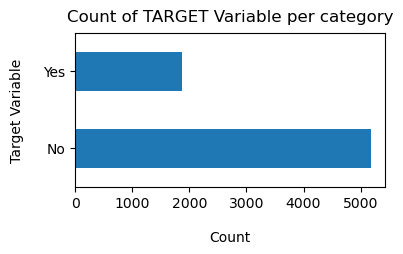

In [9]:
data['Churn'].value_counts().plot(kind='barh',figsize=(4,2))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02)

We now calculate % distribution of values in the 'Churn' column as it is useful for understanding the balance or idstribution of the target variable, which is important when working on classification problems for churn prediction.

In [10]:
100*data['Churn'].value_counts()/len(data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [11]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.duplicated().sum()

0

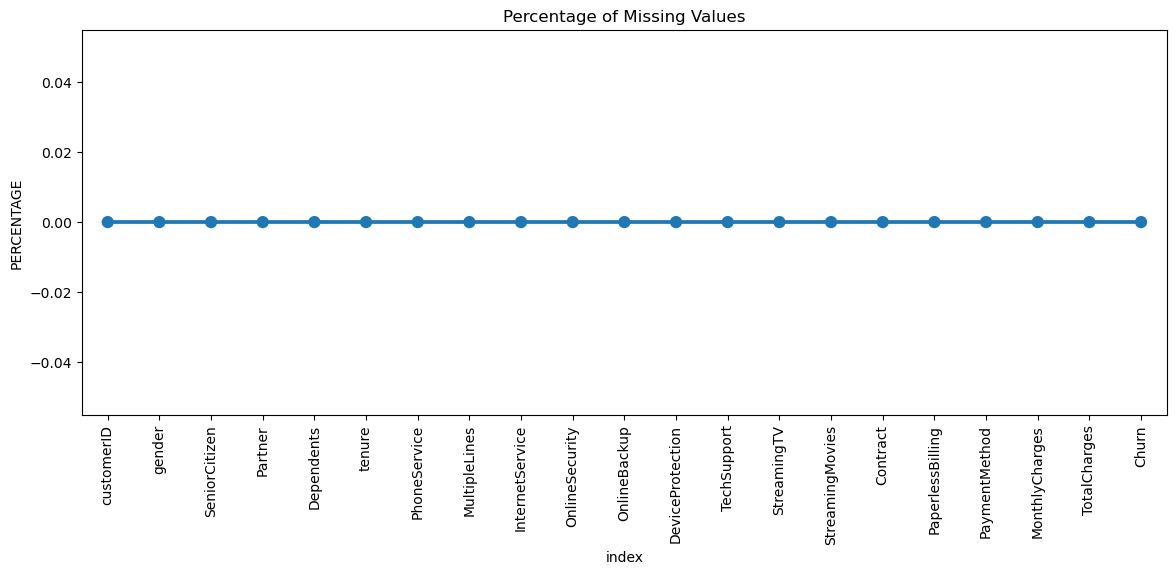

In [15]:
# Graphically visualize, missing values in the dataset
missing = pd.DataFrame((data.isnull().sum()) * 100 / data.shape[0]).reset_index()
plt.figure(figsize=(14, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('PERCENTAGE')
plt.show()

### Data Cleaning

In [16]:
telco_data=data.copy() #create a copy of base data for manipulation

As we have already observed in above cells that TotalCharges is given a sobject datatype but it should be float datatype. We will fix it here.

In [17]:
#Total charges should be numeric amount and convert it to numerical data type
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 values in TotalCharges now which are NaN.

In [18]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Missing Value treatment

In [19]:
# Removing missing values
telco_data.dropna(how='any',inplace=True)

#telco_data.fillna(0)    # fill with 0 - other option

### Feature Distribution

We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

In [20]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target="Churn"

### Numerical features distribution
Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distribution and it is hard to observe outliers with it. That is the reason we use histograms.

In [21]:
telco_data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

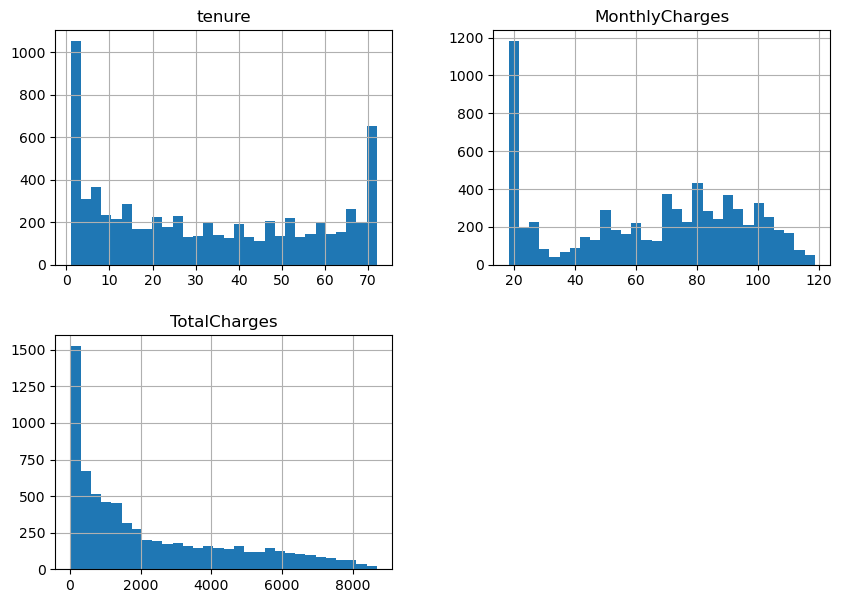

In [22]:
telco_data[numerical_features].hist(bins=30,figsize=(10,7))

We look at distributions of numerical features in relation to the taeget variable. We can observe that the greater TotalCharges and Tenure are the less is the probability of churn.

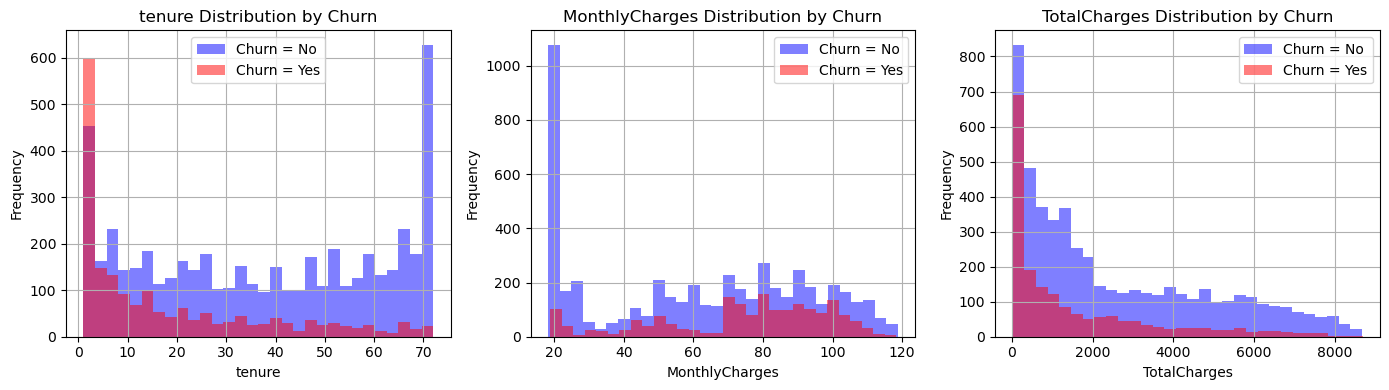

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Iterate through numerical features
for i, feature in enumerate(numerical_features):
    # Plot histogram for 'Churn = No'
    telco_data[telco_data.Churn == "No"][feature].hist(bins=30, color='blue', alpha=0.5, ax=ax[i], label='Churn = No')
    # Plot histogram for 'Churn = Yes'
    telco_data[telco_data.Churn == "Yes"][feature].hist(bins=30, color='red', alpha=0.5, ax=ax[i], label='Churn = Yes')

    # Set labels and title
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f'{feature} Distribution by Churn')
    ax[i].legend()

plt.tight_layout()
plt.show()

### Categorical feature distribution
To analyze categorical features, we use bar charts.

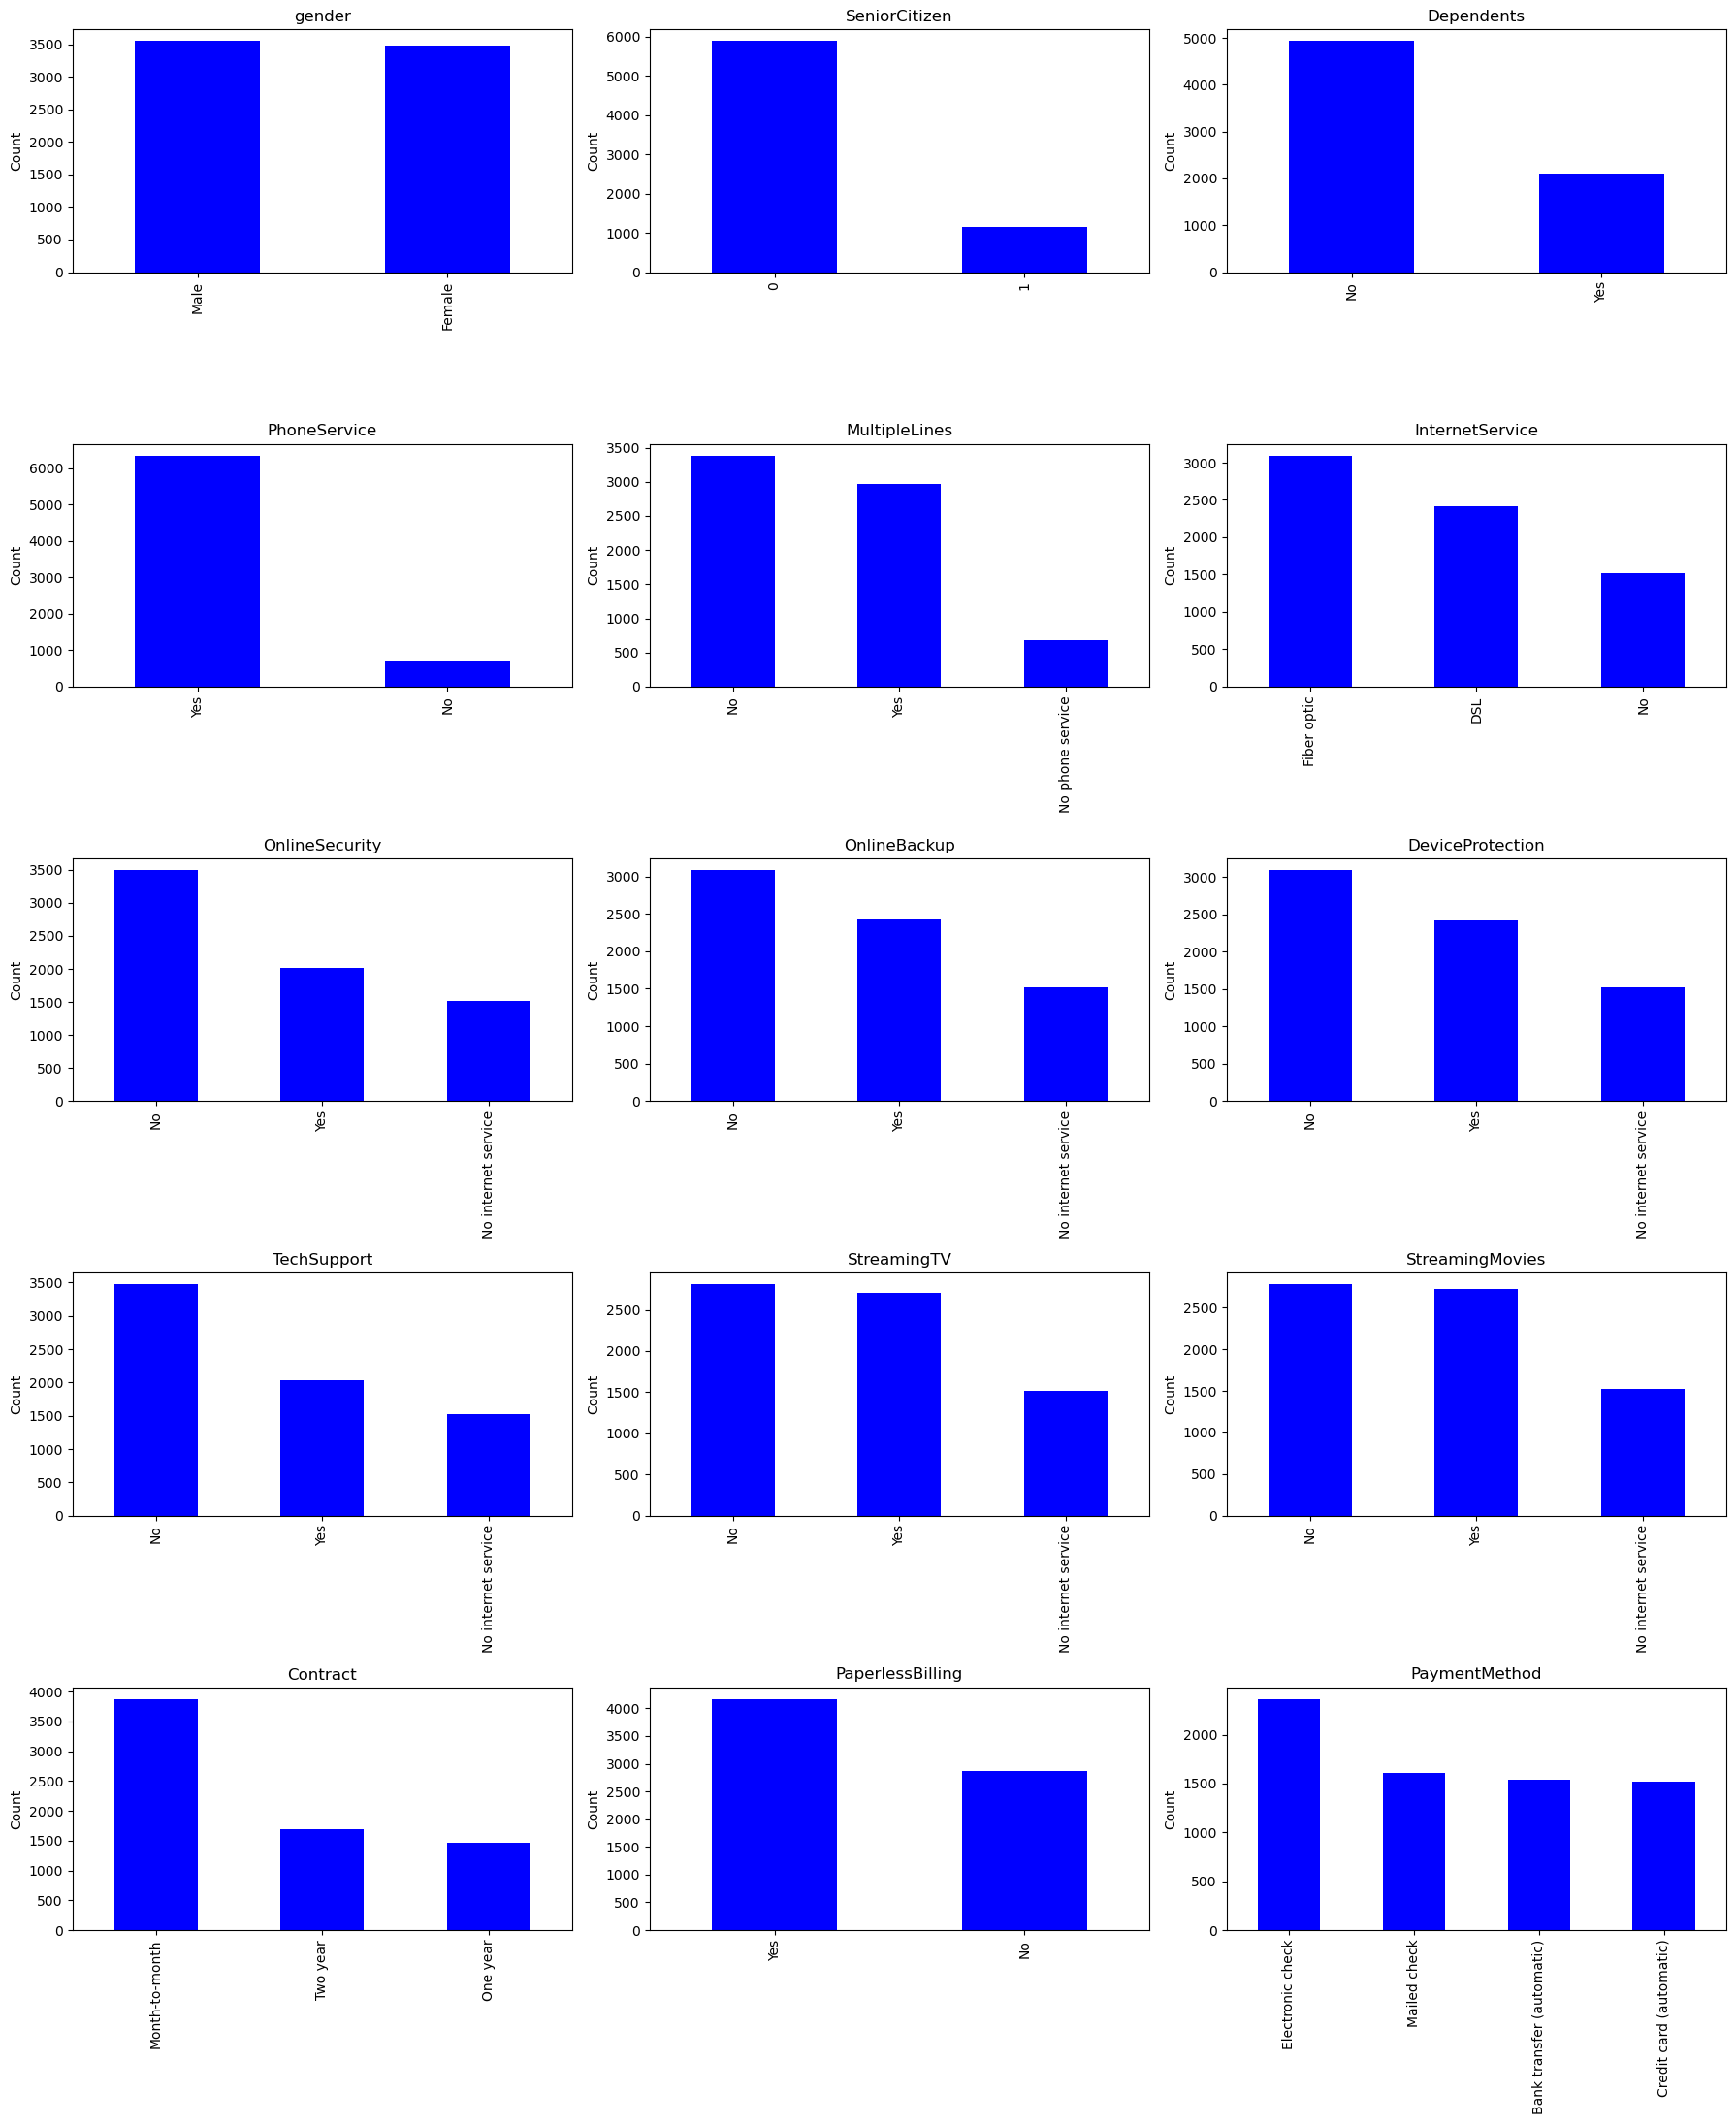

In [24]:
ROWS, COLS = 5, 3  
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))

for i, categorical_feature in enumerate(categorical_features):
    row, col = divmod(i, COLS)
    telco_data[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col], color='blue')
    ax[row, col].set_title(categorical_feature)
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

We observe that Senior citizens and customers without phone service are less represented
in the data.The next step is to look at categorical features in relation to the target variable.

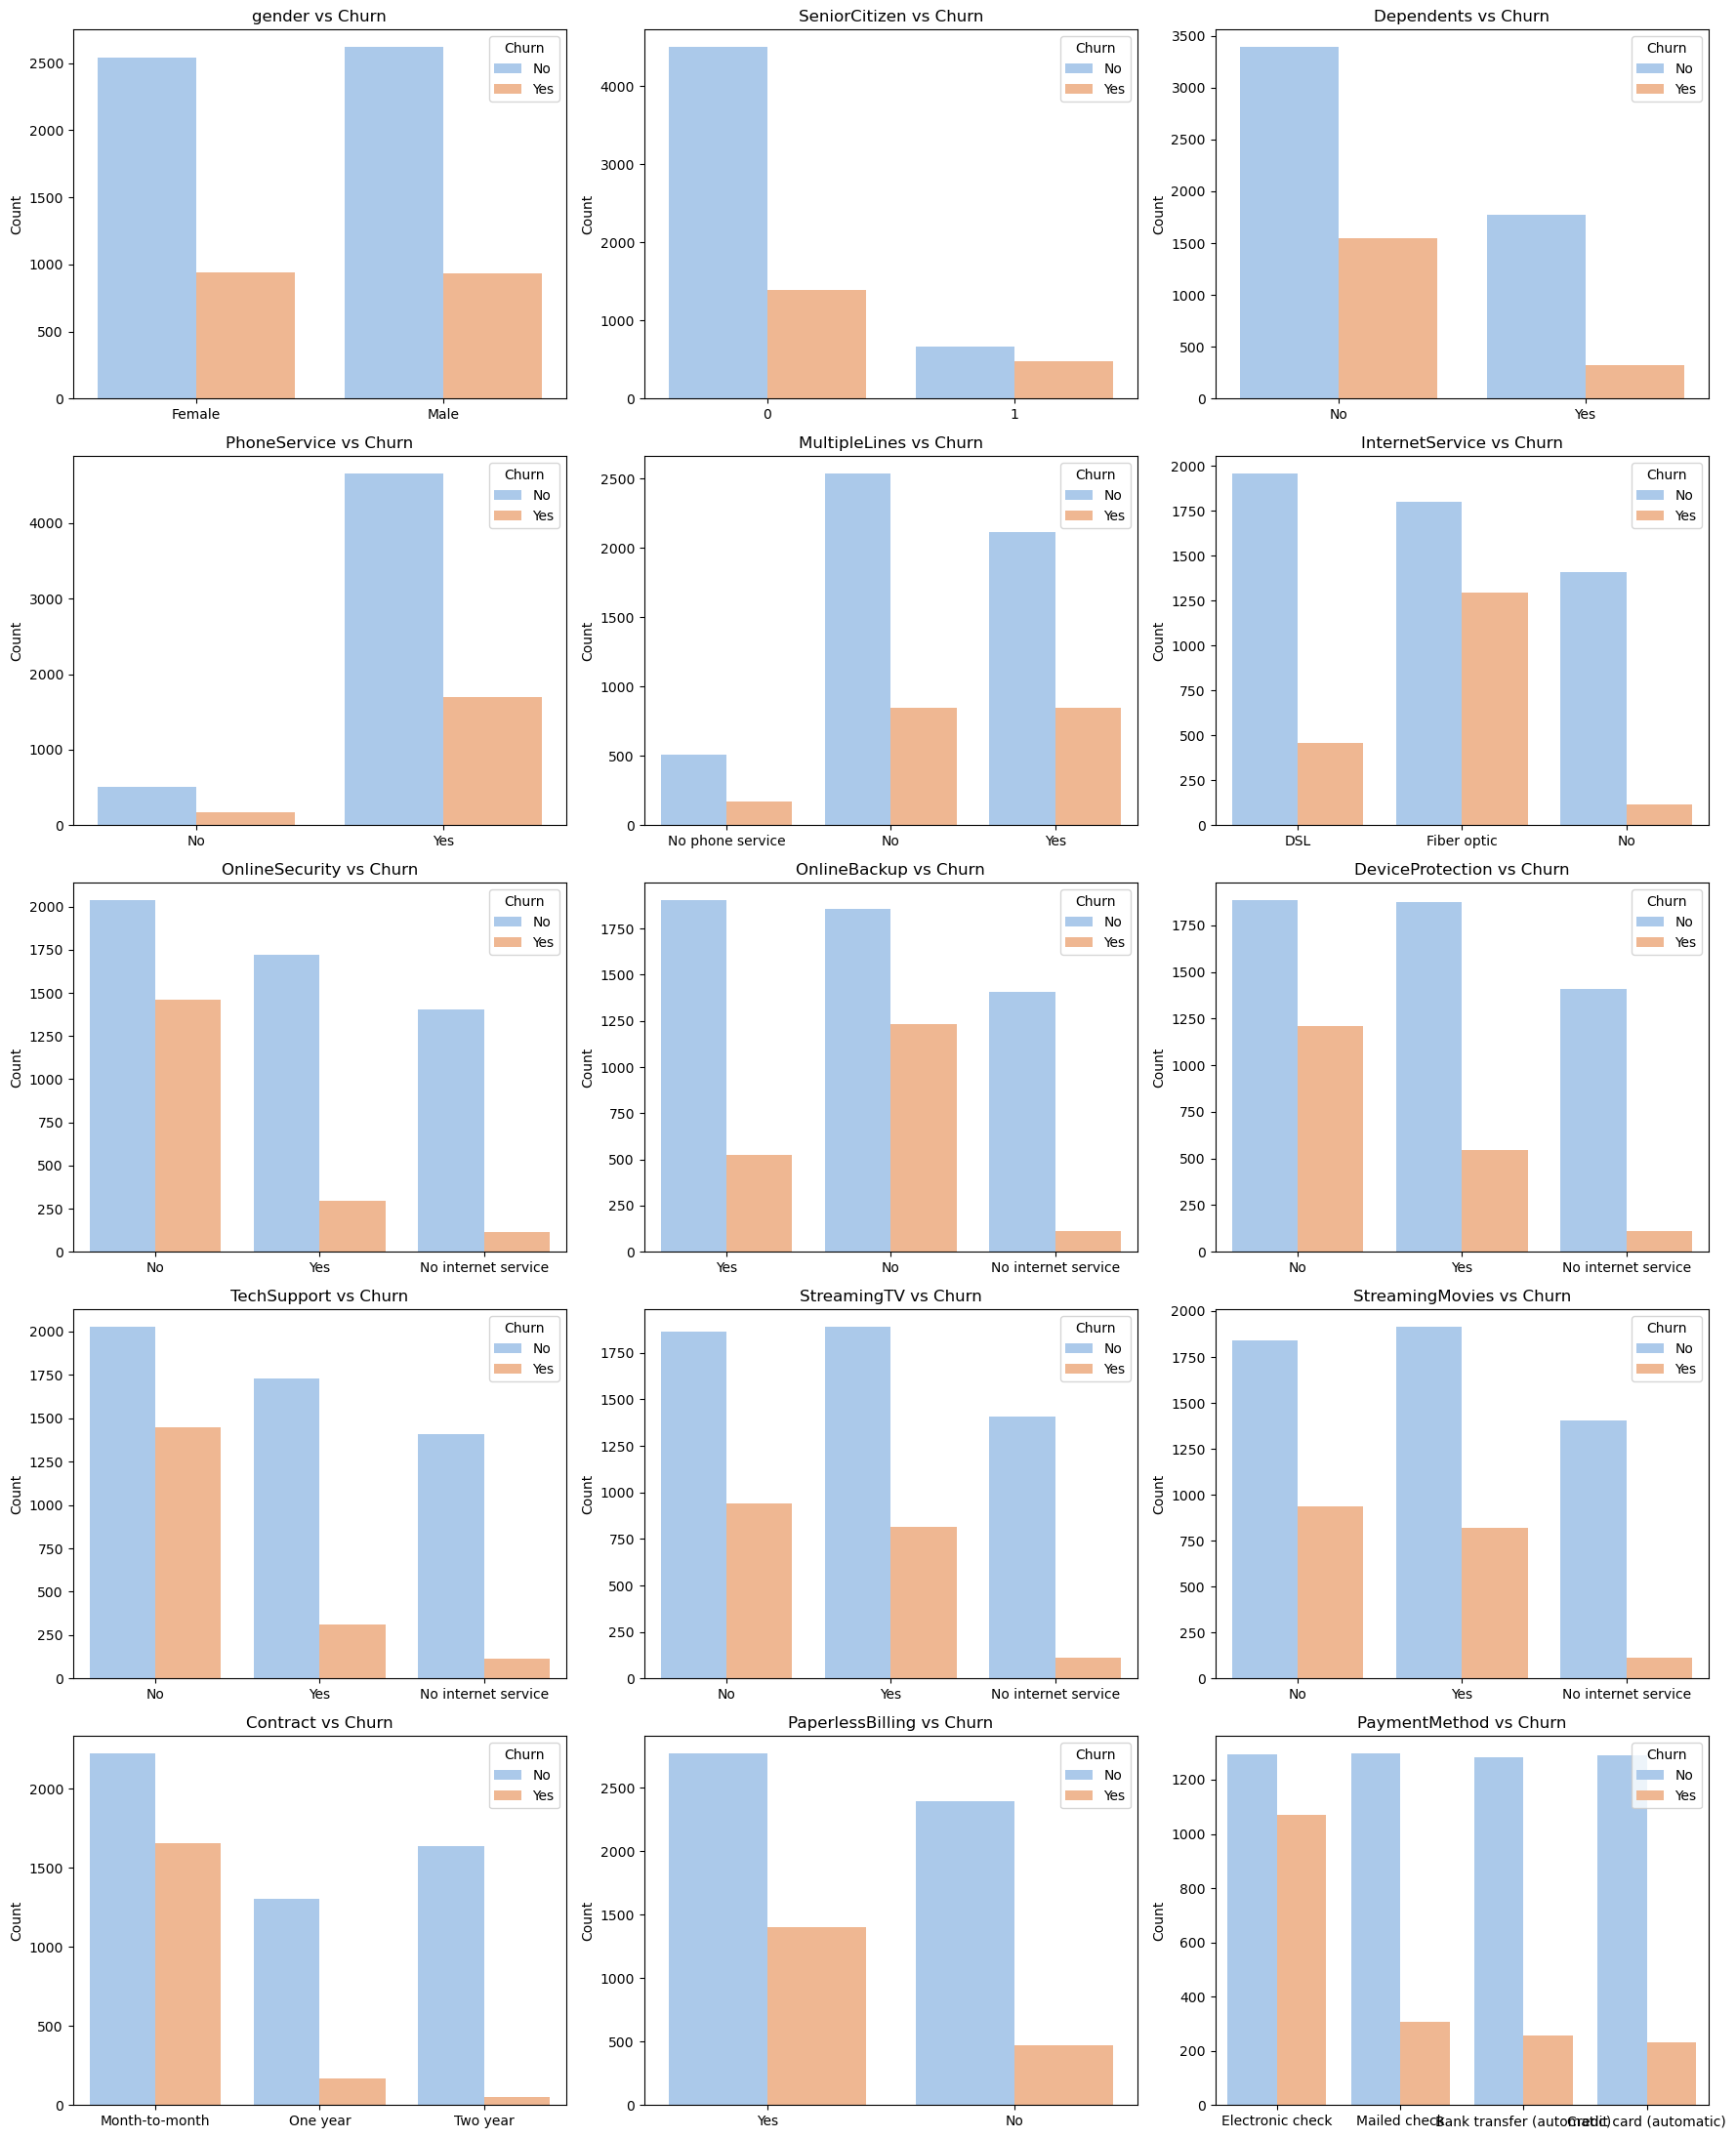

In [25]:
ROWS, COLS = 5, 3  
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))

for i, categorical_feature in enumerate(categorical_features):
    row, col = divmod(i, COLS)
    sns.countplot(x=categorical_feature, hue='Churn', data=telco_data, ax=ax[row, col], palette='pastel')
    ax[row, col].set_title(f'{categorical_feature} vs Churn')
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

- Customers on month-to-month contracts churn more than those on one-year contracts.
- Customers with paperless billing churn less than those with paper bills.
- Younger customers (possibly female) churn more compared to older customers (possibly male).
- Customers without phone service churn more than those with any phone service plan. Customers with multiple phone lines churn slightly less than those with one line.
- Customers without internet service churn more than those with internet service. No significant difference observed between fiber optic and other internet options.
- Unclear patterns for churn rate in relation to online security features, tech support usage, streaming services, and payment method.

### Data Transformation

We dont need customerID for churn prediction, so drop customerID. 

In [26]:
# drop column customer ID
telco_data.drop(columns=['customerID'],axis = 1 , inplace=True)
telco_data.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convert the target variable 'Churn’ in a binary numeric variable i.e.  Yes=1; No=0 

In [27]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0) 

In [28]:
telco_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [29]:
telco_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [30]:
for column in telco_data.columns:
    unique_values = telco_data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'gender':
['Female' 'Male']

Unique values in column 'SeniorCitizen':
[0 1]

Unique values in column 'Partner':
['Yes' 'No']

Unique values in column 'Dependents':
['No' 'Yes']

Unique values in column 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Unique values in column 'PhoneService':
['No' 'Yes']

Unique values in column 'MultipleLines':
['No phone service' 'No' 'Yes']

Unique values in column 'InternetService':
['DSL' 'Fiber optic' 'No']

Unique values in column 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Unique values in column 'OnlineBackup':
['Yes' 'No' 'No internet service']

Unique values in column 'DeviceProtection':
['No' 'Yes' 'No internet service']

Unique values in column 'TechSupport':
['No' 'Yes' 'No internet service']

Unique values in column 'StreamingT

#### Convert all the categorical variables into numbers first for correlation as well as prediction

#### Using Label Encoder from Sklearn.preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder

columns_to_exclude = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# the list of columns after excluding the specified columns
columns_to_encode = telco_data.drop(columns=columns_to_exclude).columns.tolist()

# use LabelEncoder to convert category strings into category numbers
label_encoder = LabelEncoder()
for col in columns_to_encode:
    telco_data[col] = label_encoder.fit_transform(telco_data[col])

In [32]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Data Visualization

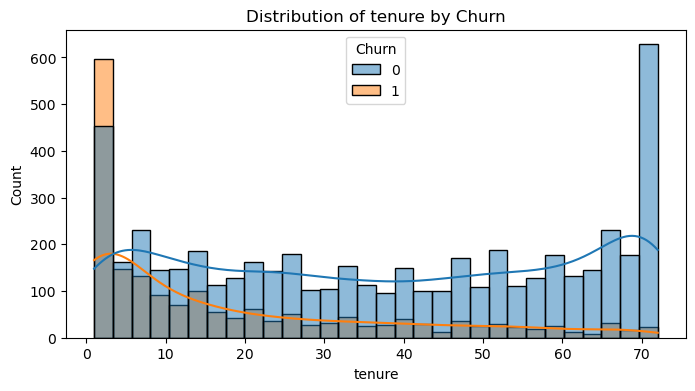

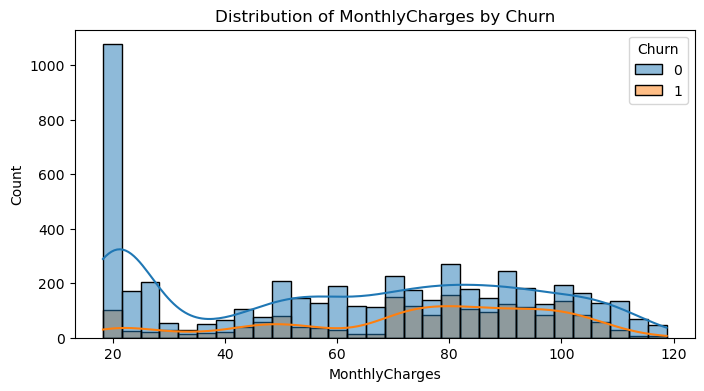

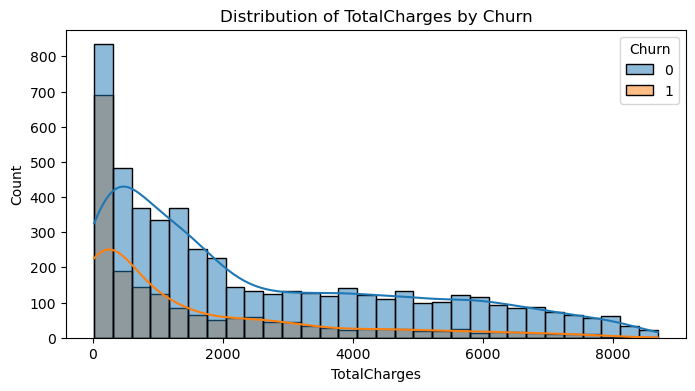

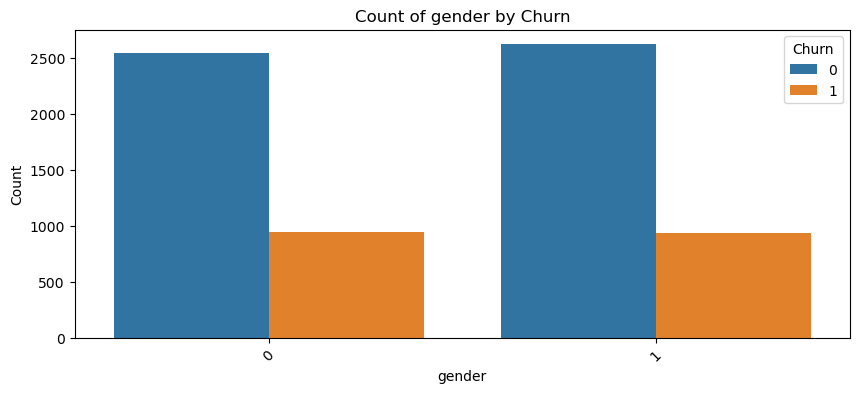

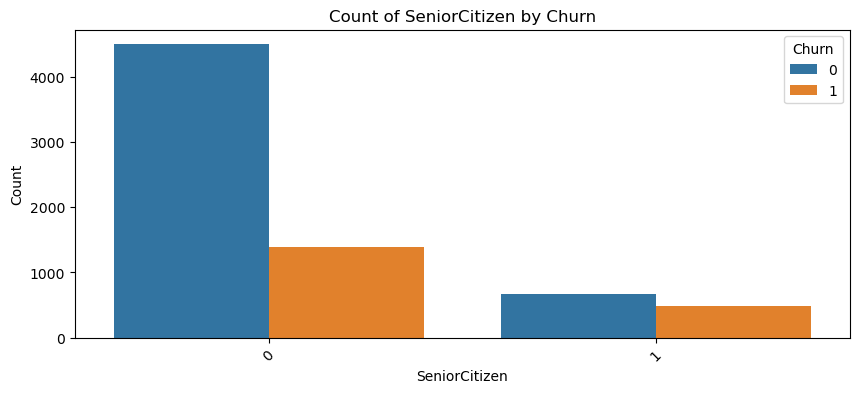

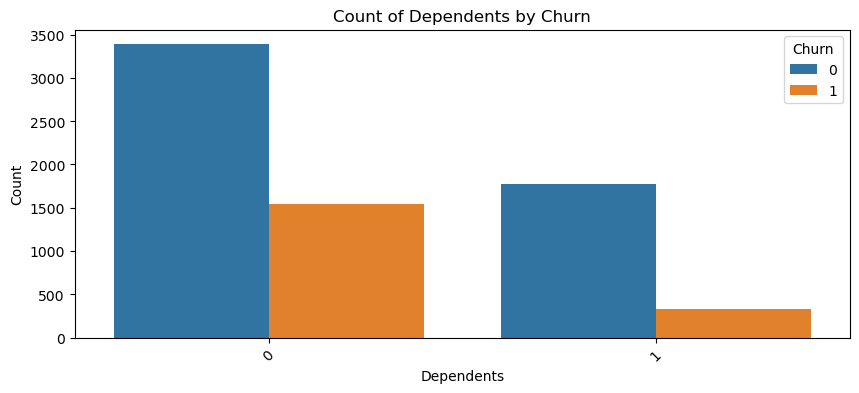

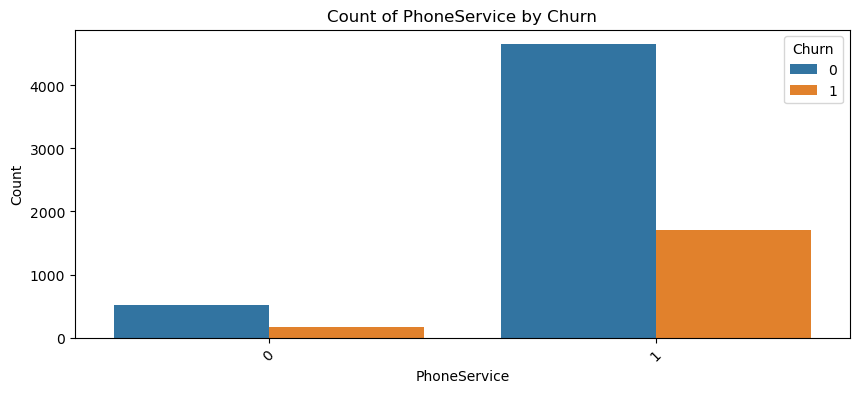

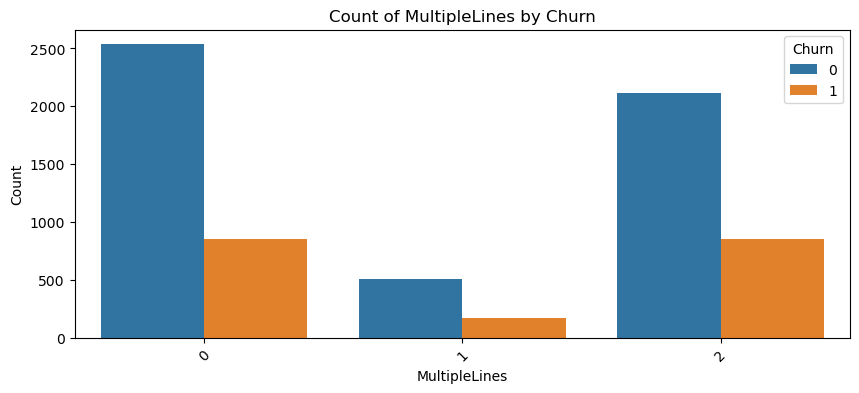

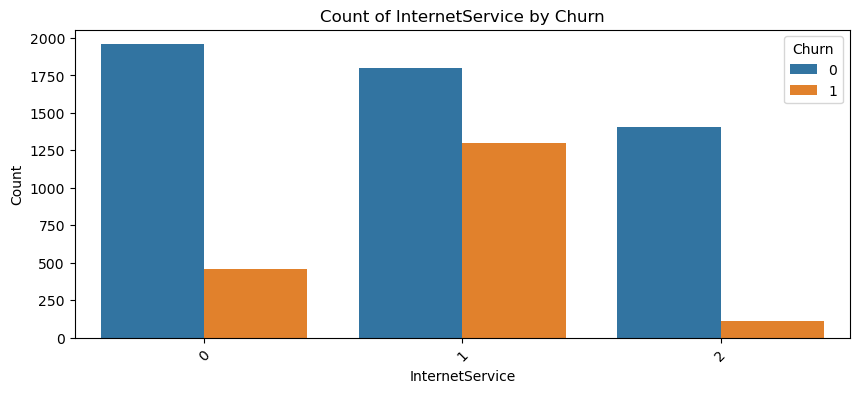

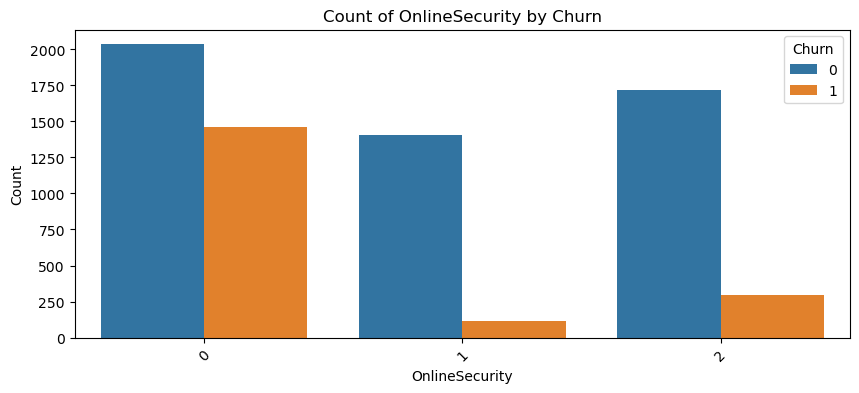

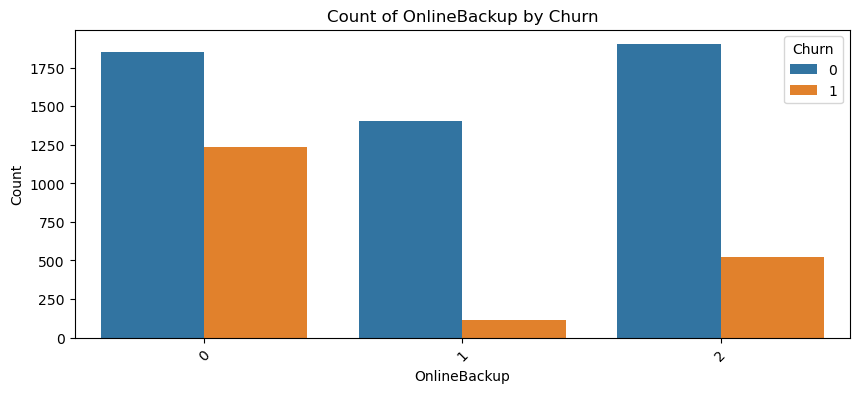

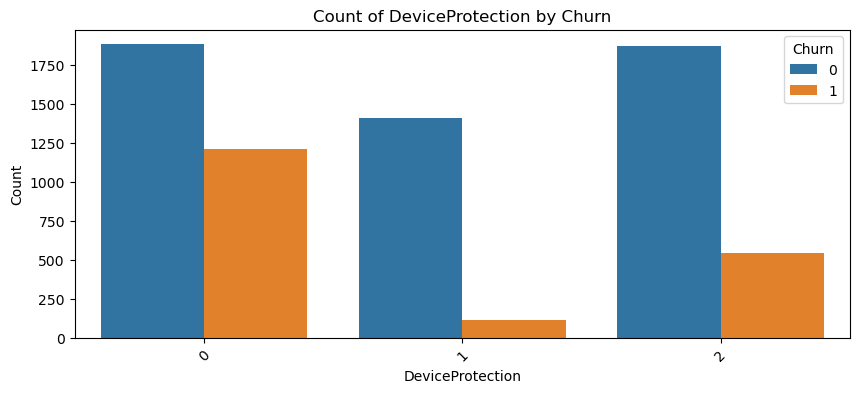

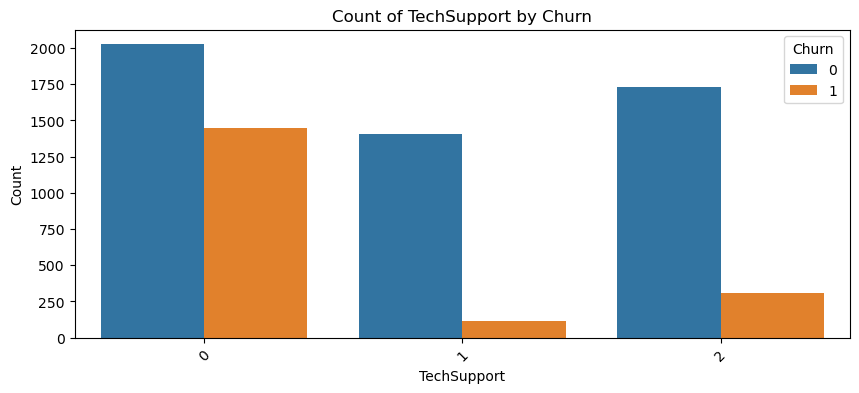

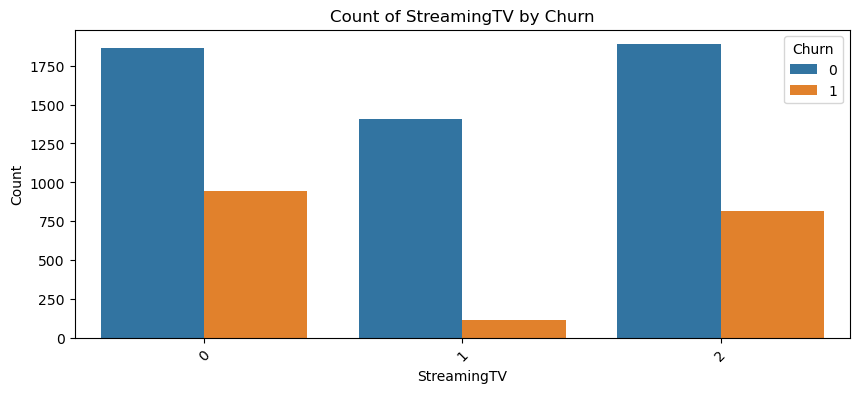

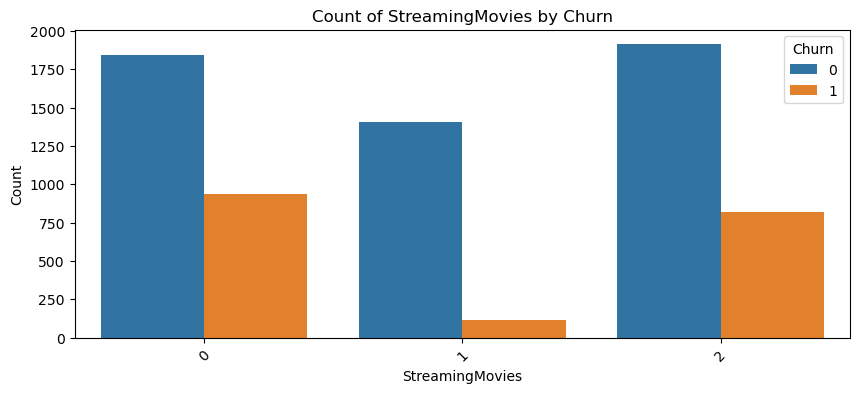

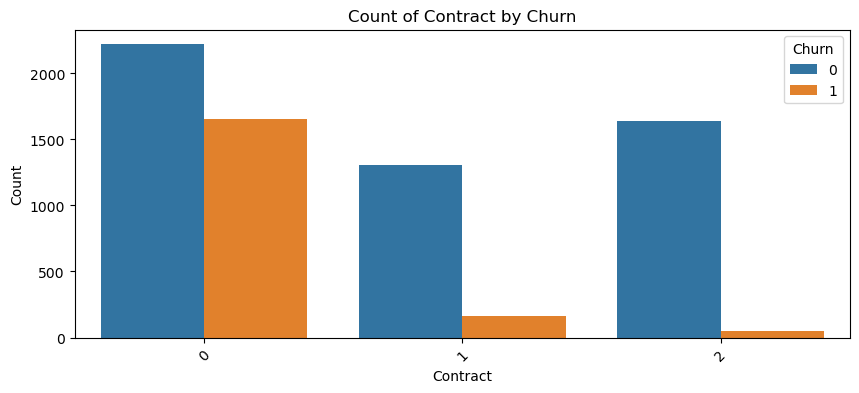

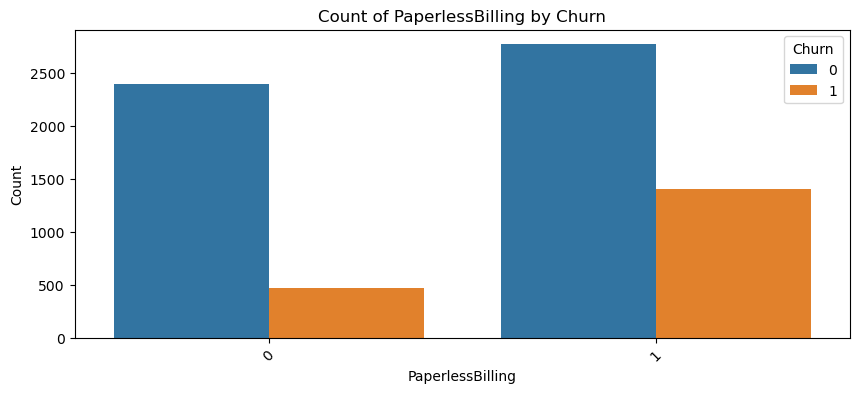

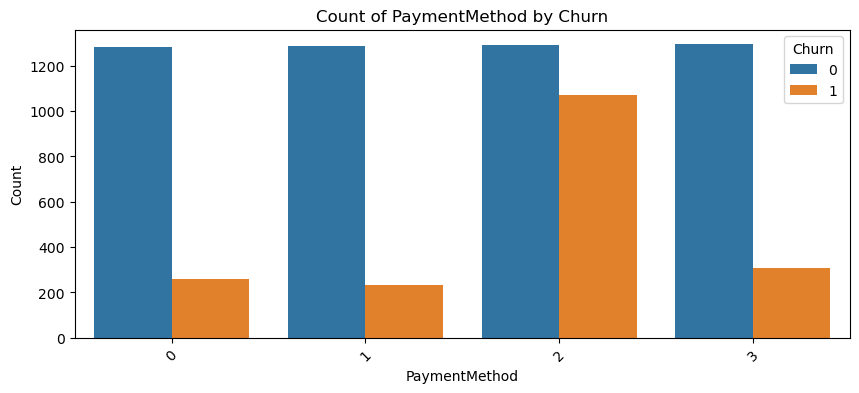

In [33]:
# Visualize the distribution of numerical features
#numerical_features = ["tenure”, "MonthlyCharges"”, "TotalCharges"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=telco_data, x=feature, hue="Churn", bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
           
# Visualize the distribution of categorical features
#categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents","PhoneService", "MultiplelLines", "InternetService","OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport", "StreamingTV", "StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod"]
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=telco_data, x=feature, hue="Churn")
    plt.title(f'Count of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show() 

#### Visualize the correlation between features

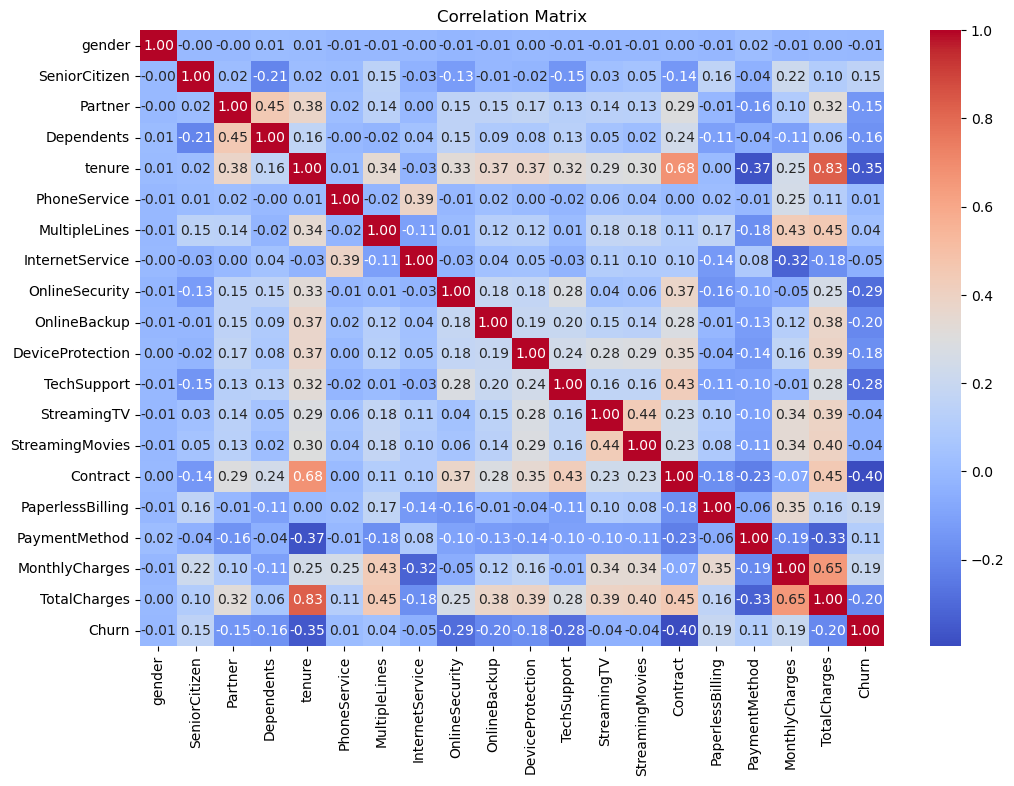

In [34]:
# Visualize the correlation between features
plt.figure(figsize=(12, 8))
correlation_matrix = telco_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show() 

In [35]:
# Extract the correlation values as a DataFrame
correlation_values = correlation_matrix.stack().reset_index()
correlation_values.columns = ['Feature1', 'Feature2', 'Correlation']
# Print the correlation values
print("Correlation values between features:")
print(correlation_values) 

Correlation values between features:
    Feature1          Feature2  Correlation
0     gender            gender     1.000000
1     gender     SeniorCitizen    -0.001819
2     gender           Partner    -0.001379
3     gender        Dependents     0.010349
4     gender            tenure     0.005285
..       ...               ...          ...
395    Churn  PaperlessBilling     0.191454
396    Churn     PaymentMethod     0.107852
397    Churn    MonthlyCharges     0.192858
398    Churn      TotalCharges    -0.199484
399    Churn             Churn     1.000000

[400 rows x 3 columns]


In [36]:
# Sort correlation values by absolute correlation in descending order
sorted_correlation_values = correlation_values.sort_values(by='Correlation', ascending=False)

# Print the sorted correlation values
print("Correlation values sorted by maximum correlation:")
print(sorted_correlation_values)

Correlation values sorted by maximum correlation:
             Feature1          Feature2  Correlation
0              gender            gender     1.000000
210  DeviceProtection  DeviceProtection     1.000000
63         Dependents        Dependents     1.000000
84             tenure            tenure     1.000000
105      PhoneService      PhoneService     1.000000
..                ...               ...          ...
99             tenure             Churn    -0.354049
96             tenure     PaymentMethod    -0.370087
324     PaymentMethod            tenure    -0.370087
394             Churn          Contract    -0.396150
299          Contract             Churn    -0.396150

[400 rows x 3 columns]


In [37]:
# Filter out pairs with correlation equal to 1
filtered_correlation_values = sorted_correlation_values[sorted_correlation_values['Correlation'] < 1]

# Print the filtered correlation values
print("Correlation values sorted by maximum correlation (excluding correlation = 1):")
print(filtered_correlation_values)


Correlation values sorted by maximum correlation (excluding correlation = 1):
           Feature1       Feature2  Correlation
364    TotalCharges         tenure     0.825880
98           tenure   TotalCharges     0.825880
284        Contract         tenure     0.676734
94           tenure       Contract     0.676734
358  MonthlyCharges   TotalCharges     0.651065
..              ...            ...          ...
99           tenure          Churn    -0.354049
96           tenure  PaymentMethod    -0.370087
324   PaymentMethod         tenure    -0.370087
394           Churn       Contract    -0.396150
299        Contract          Churn    -0.396150

[380 rows x 3 columns]


In [38]:
# Remove duplicates where Feature1 and Feature2 are swapped and have the same correlation
filtered_correlation_values_unique = correlation_values[correlation_values['Feature1'] < correlation_values['Feature2']]

# Print the unique correlation values
print("Unique correlation values sorted by maximum correlation (excluding correlation = 1):")
print(filtered_correlation_values_unique)

Unique correlation values sorted by maximum correlation (excluding correlation = 1):
          Feature1          Feature2  Correlation
4           gender            tenure     0.005285
20   SeniorCitizen            gender    -0.001819
24   SeniorCitizen            tenure     0.015683
31   SeniorCitizen       TechSupport    -0.151007
32   SeniorCitizen       StreamingTV     0.031019
..             ...               ...          ...
394          Churn          Contract    -0.396150
395          Churn  PaperlessBilling     0.191454
396          Churn     PaymentMethod     0.107852
397          Churn    MonthlyCharges     0.192858
398          Churn      TotalCharges    -0.199484

[190 rows x 3 columns]


In [39]:
# Sort correlation values by absolute correlation in descending order
sorted_filtered_correlation_values_unique = filtered_correlation_values_unique.sort_values(by='Correlation', ascending=False)

# Print the sorted correlation values
print("Correlation values sorted by maximum correlation:")
print(sorted_filtered_correlation_values_unique)

Correlation values sorted by maximum correlation:
            Feature1        Feature2  Correlation
364     TotalCharges          tenure     0.825880
284         Contract          tenure     0.676734
358   MonthlyCharges    TotalCharges     0.651065
138    MultipleLines    TotalCharges     0.453202
62        Dependents         Partner     0.452269
..               ...             ...          ...
157  InternetService  MonthlyCharges    -0.322173
338    PaymentMethod    TotalCharges    -0.330594
384            Churn          tenure    -0.354049
324    PaymentMethod          tenure    -0.370087
394            Churn        Contract    -0.396150

[190 rows x 3 columns]


In [40]:
# Filter correlation values for those involving 'Churn'
churn_correlation_values = sorted_filtered_correlation_values_unique[sorted_filtered_correlation_values_unique['Feature1'] == 'Churn']

# Print correlation values of each column with 'Churn' in descending order of correlation value
print("Correlation values of each column with 'Churn' (in descending order):")
print(churn_correlation_values)

Correlation values of each column with 'Churn' (in descending order):
    Feature1          Feature2  Correlation
397    Churn    MonthlyCharges     0.192858
395    Churn  PaperlessBilling     0.191454
381    Churn     SeniorCitizen     0.150541
396    Churn     PaymentMethod     0.107852
386    Churn     MultipleLines     0.038043
385    Churn      PhoneService     0.011691
380    Churn            gender    -0.008545
392    Churn       StreamingTV    -0.036303
393    Churn   StreamingMovies    -0.038802
387    Churn   InternetService    -0.047097
382    Churn           Partner    -0.149982
383    Churn        Dependents    -0.163128
390    Churn  DeviceProtection    -0.177883
389    Churn      OnlineBackup    -0.195290
398    Churn      TotalCharges    -0.199484
391    Churn       TechSupport    -0.282232
388    Churn    OnlineSecurity    -0.289050
384    Churn            tenure    -0.354049
394    Churn          Contract    -0.396150


In [41]:
# Filter correlation values for those greater than 0.5
filtered_correlation_values_greater_than_05 = sorted_filtered_correlation_values_unique[sorted_filtered_correlation_values_unique['Correlation'] > 0.5]

# Print correlation values greater than 0.5
print("Correlation values greater than 0.5:")
print(filtered_correlation_values_greater_than_05)

Correlation values greater than 0.5:
           Feature1      Feature2  Correlation
364    TotalCharges        tenure     0.825880
284        Contract        tenure     0.676734
358  MonthlyCharges  TotalCharges     0.651065


In [42]:
# Filter correlation values for those greater than 0.4
filtered_correlation_values_greater_than_04 = sorted_filtered_correlation_values_unique[sorted_filtered_correlation_values_unique['Correlation'] > 0.4]

# Print correlation values greater than 0.4
print("Correlation values greater than 0.4:")
print(filtered_correlation_values_greater_than_04)

Correlation values greater than 0.4:
            Feature1       Feature2  Correlation
364     TotalCharges         tenure     0.825880
284         Contract         tenure     0.676734
358   MonthlyCharges   TotalCharges     0.651065
138    MultipleLines   TotalCharges     0.453202
62        Dependents        Partner     0.452269
298         Contract   TotalCharges     0.450306
272  StreamingMovies    StreamingTV     0.435354
346   MonthlyCharges  MultipleLines     0.433905
291         Contract    TechSupport     0.425072


#### Feature Selection

1. Features to Consider:

- TotalCharges and Tenure: These two features have a very high correlation of 0.825880. Both features are likely related to the duration and cost of the service, which could be strong indicators of customer behavior.
- Contract and Tenure: With a correlation of 0.676734, this suggests that customers with longer contract durations tend to have longer tenure. Contract length might influence customer loyalty and churn behavior.
- MonthlyCharges and TotalCharges: These features have a correlation of 0.651065, indicating that customers with higher monthly charges tend to have higher total charges. High charges might affect customer satisfaction and influence churn decisions.

Reasons for Selection:

- High Correlation: These features exhibit high correlation, suggesting a strong relationship with each other. Including them in the model might improve its predictive power.
- Relevance to Churn Prediction: Total charges, tenure, contract length, and monthly charges are all likely related to customer behavior and satisfaction, making them potentially valuable for predicting churn.

2. Features to Drop:

- StreamingTV and StreamingMovies: These features have a correlation of 0.435354, indicating a moderate relationship. However, streaming services might not directly influence churn behavior as much as factors like contract length or monthly charges.
- OnlineBackup and DeviceProtection: These features have correlations below 0.2 with churn, suggesting a weak relationship. While they may contribute to overall customer satisfaction, they might not be strong predictors of churn compared to other features.

Reasons for Dropping:

- Low Correlation with Churn: These features have relatively low correlation with churn compared to others, indicating they might not be as influential in predicting churn behavior.
- Limited Predictive Power: While features like online backup and device protection could impact customer satisfaction, they may not directly influence churn decisions as much as other factors like contract length or monthly charges.

In [43]:
telco_data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0


In [44]:
# Drop the features mentioned from the telco_data DataFrame
telco_data.drop(['StreamingTV', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection'], axis=1, inplace=True)

In [45]:
telco_data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,0,0,1,2,29.85,29.85,0


In [46]:
telco_data.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

1. Features to Consider:

- 'PaperlessBilling': It has a positive correlation with 'Churn', indicating that customers with paperless billing are more likely to churn. Therefore, it might be valuable for predicting churn.
- 'PaymentMethod': Although the correlation is not very high, it still shows a positive correlation with 'Churn'. Different payment methods might influence customer behavior and churn, so it's advisable to keep this column.

2. Cols to Consider Dropping:

- 'MultipleLines', 'PhoneService', 'InternetService': These columns have very low correlation values with 'Churn', suggesting they might not be strong predictors of churn. However, it's essential to consider other factors like domain knowledge or business context before dropping them.
- 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity': These columns have negative correlations with 'Churn', indicating that customers with partners, dependents, or subscribed to tech support and online security services are less likely to churn. Again, it's crucial to consider domain knowledge and business context before deciding to drop them.

In [47]:
# List of columns to drop
cols_to_drop = ['MultipleLines', 'PhoneService', 'InternetService', 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity']

# Drop the columns from the dataframe
telco_data = telco_data.drop(cols_to_drop, axis=1)


In [48]:
telco_data.head(1)

,gender,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,2,29.85,29.85,0


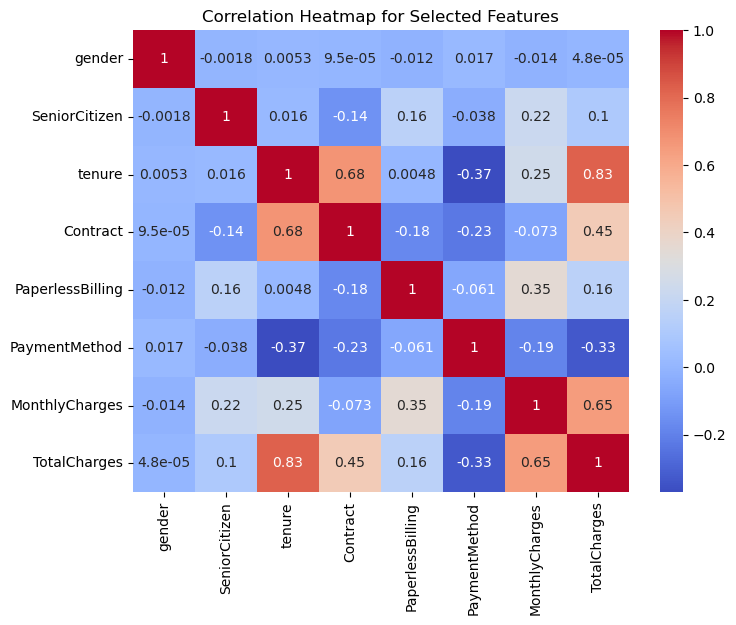

Correlation values between selected features:
                    gender  SeniorCitizen    tenure  Contract  \
gender            1.000000      -0.001819  0.005285  0.000095   
SeniorCitizen    -0.001819       1.000000  0.015683 -0.141820   
tenure            0.005285       0.015683  1.000000  0.676734   
Contract          0.000095      -0.141820  0.676734  1.000000   
PaperlessBilling -0.011902       0.156258  0.004823 -0.175475   
PaymentMethod     0.016942      -0.038158 -0.370087 -0.229636   
MonthlyCharges   -0.013779       0.219874  0.246862 -0.072739   
TotalCharges      0.000048       0.102411  0.825880  0.450306   

                  PaperlessBilling  PaymentMethod  MonthlyCharges  \
gender                   -0.011902       0.016942       -0.013779   
SeniorCitizen             0.156258      -0.038158        0.219874   
tenure                    0.004823      -0.370087        0.246862   
Contract                 -0.175475      -0.229636       -0.072739   
PaperlessBilling       

In [49]:
selected_features = ["gender", "SeniorCitizen", "tenure", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]
# Extract the correlation matrix for the selected features
selected_correlation_matrix = telco_data[selected_features].corr()
# Create a heatmap for the selected features
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Features')
# Show the heatmap
plt.show()

# Print the correlation values
print("Correlation values between selected features:")
print(selected_correlation_matrix) 

In [50]:
telco_data.columns.tolist()

['gender',
 'SeniorCitizen',
 'tenure',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

### Derived conclusion from the Correlation:

From the correlation values between the selected features:

1. **Gender**: There is very weak correlation between gender and other features. Gender seems to have negligible impact on the other variables.

2. **SeniorCitizen**: There is a moderate positive correlation between being a senior citizen and monthly charges, indicating that senior citizens tend to have slightly higher monthly charges.

3. **Tenure**: Tenure shows strong positive correlations with total charges and contract. This suggests that customers with longer tenure tend to have higher total charges and are more likely to have a contract.

4. **Contract**: Contract also exhibits strong positive correlation with tenure and total charges. This indicates that customers with a contract tend to have longer tenure and higher total charges.

5. **PaperlessBilling**: There is a moderate positive correlation between paperless billing and monthly charges. This implies that customers with paperless billing tend to have slightly higher monthly charges.

6. **PaymentMethod**: Payment method shows a moderate negative correlation with tenure and total charges. Customers with certain payment methods tend to have lower tenure and total charges.

7. **MonthlyCharges**: Monthly charges exhibit a moderate positive correlation with paperless billing and a moderate negative correlation with contract. This suggests that customers with higher monthly charges are more likely to use paperless billing and less likely to have a contract.

8. **TotalCharges**: Total charges have strong positive correlations with tenure and contract, indicating that customers with higher total charges tend to have longer tenure and are more likely to have a contract.

Based on these correlations, we can conclude that tenure and contract status are the most influential factors related to total charges, while monthly charges are influenced by paperless billing and contract status. Senior citizenship has a moderate influence on monthly charges. Gender seems to have negligible impact on the other variables, and the impact of payment method on tenure and total charges is relatively moderate.

1. Tenure vs. Total Charges:
- There is a strong positive correlation of approximately 0.83 between "tenure" (the length of time a customer has been with the company) and "TotalCharges" (the total charges incurred by the customer).
- This indicates that customers who have been with the company for a longer time tend to have higher total charges, which is expected as they accumulate charges over time.

2. Contract vs. Tenure:
- There is a strong positive correlation of approximately 0.68 between "Contract" (the type of contract the customer has) and "tenure."
- This suggests that customers with longer tenure are more likely to have a contract with the company, which aligns with the idea that contract customers are likely to stay with the company for a longer duration.

3. Monthly Charges vs. Total Charges:
- There is a strong positive correlation of approximately 0.65 between "MonthlyCharges" (the monthly charges incurred by the customer) and "TotalCharges."
- This indicates that customers with higher monthly charges tend to have higher total charges, which is expected as monthly charges contribute to the total amount paid over time.

4. Monthly Charges vs. Tenure:
- There is a positive correlation of approximately 0.25 between "MonthlyCharges" and "tenure."
- This suggests that as the monthly charges increase, customers with longer tenure are likely to be paying those higher charges.

5. Payment Method vs. Tenure:
- There is a moderate negative correlation of approximately -0.37 between "PaymentMethod" (the method of payment chosen by the customer) and "tenure."
- This suggests that customers with certain payment methods tend to have shorter tenure with the company, indicating a potential relationship between payment method and customer retention.

6. Paperless Billing vs. Monthly Charges:
- There is a moderate positive correlation of approximately 0.35 between "PaperlessBilling" (whether the customer opts for paperless billing) and "MonthlyCharges."
- This suggests that customers who opt for paperless billing tend to have slightly higher monthly charges, which may be due to the convenience associated with paperless billing.

7. SeniorCitizen vs. Total Charges:
- There is a weak positive correlation of approximately 0.10 between "SeniorCitizen" (a binary indicator for senior citizen status) and "TotalCharges."
- This suggests that senior citizens may, on average, have slightly higher total charges than non-senior citizens, although the correlation is weak.

### Derived Insight

<b>1. Customer Likely to Churn:</b>
- Customers with shorter tenure and lower total charges are more likely to churn.
- Additionally, customers with month-to-month contracts and higher monthly charges are also at a higher risk of churning.


<i>Conclusion based on above:</i>


- Newer customers and those with lower spending are less committed and more likely to churn.
- Customers with flexible (month-to-month) contracts and higher monthly expenses are also prone to churn, possibly due to dissatisfaction or exploring alternatives.

<b>2. Factors Affecting Churn:</b>
- Tenure and total charges play significant roles in predicting churn, with shorter tenure and lower total charges indicating a higher likelihood of churn.
- Contract type (specifically, having a month-to-month contract) and monthly charges are also influential factors affecting churn.
- Payment method may also impact churn, as customers with certain payment methods tend to have shorter tenure.
- Paperless billing could also be a contributing factor, as it is moderately correlated with higher monthly charges, which in turn may lead to increased churn.


<i>Conclusion based on above:</i>


- Shorter tenure and lower total charges strongly indicate a higher likelihood of churn.
- Having a month-to-month contract and higher monthly charges are also influential factors in predicting churn.
- Certain payment methods may contribute to shorter tenure and thus impact churn rates.
- Paperless billing, which correlates moderately with higher monthly charges, may also contribute to increased churn.

<b>3. Strategies for Customer Retention:</b>
- Personalized Offers: Offer personalized retention incentives, discounts, or loyalty rewards to long-term customers with higher total charges to encourage them to stay.
- Onboarding Programs: Implement onboarding programs for new customers to help them understand the value of your services and foster a positive early experience.
- Price Optimization: Consider pricing strategies to retain customers with lower total charges, such as offering more affordable plans or add-on services.
- Customer Engagement: Continuously engage with customers through proactive communication and feedback surveys to address their needs and concerns.
- Senior Citizen Benefits: Recognize and cater to the needs of senior citizens by providing specialized services or discounts, as they tend to have slightly higher total charges.

<b>4. Bringing Back Churned Customers:</b>
- Win-Back Campaigns: Launch targeted win-back campaigns to re-engage with churned customers. Offer enticing promotions or value-added services to entice them to return.
- Customer Feedback: Gather feedback from churned customers to understand their reasons for leaving. Address these issues and communicate improvements.
- Reactivation Offers: Create special reactivation offers for churned customers, providing them with incentives to rejoin your services.
- Retargeting: Use digital marketing and retargeting strategies to reach out to churned customers and remind them of the benefits of your services.
- Data Analysis: Continuously analyze churned customer data to identify patterns and reasons for churn. Use these insights to refine your retention strategies.

### Modelling

Based on our feature selection, let us keep only the features we selected for our modelling. Let us create a copy of required dataframe for modelling.

In [51]:
telco_data.head(1)

,gender,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,2,29.85,29.85,0


In [52]:
telco_data_dummies=data.copy()

In [53]:
telco_data_dummies.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [54]:
telco_data_dummies.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
telco_data_dummies.drop(['customerID', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],axis=1,inplace=True)

In [56]:
telco_data_dummies.head(1)

,gender,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [57]:
telco_data_dummies.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [58]:
#Total charges should be numeric amount and convert it to numerical data type
telco_data_dummies.TotalCharges = pd.to_numeric(telco_data_dummies.TotalCharges,errors='coerce')
telco_data_dummies.isnull().sum()

gender               0
SeniorCitizen        0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 values in TotalCharges now which are NaN.

In [59]:
telco_data_dummies.loc[telco_data_dummies['TotalCharges'].isnull()==True]

,gender,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,0,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,0,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,0,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,0,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,0,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,0,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,0,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,0,Two year,No,Mailed check,73.35,NaN,No


In [60]:
# Calculate the median value of 'TotalCharges' column, ignoring NaN values
median_total_charges = np.median(telco_data_dummies['TotalCharges'][~np.isnan(telco_data_dummies['TotalCharges'])])

# Fill missing values in 'TotalCharges' column with the median value
telco_data_dummies['TotalCharges'].fillna(median_total_charges, inplace=True)

In [61]:
telco_data_dummies.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Preprocessing Pipeline

In this pipeline,
We define preprocessing steps for numerical features (imputation and scaling) and categorical features (imputation and one-hot encoding).
We combine these preprocessing steps using ColumnTransformer.

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical and categorical features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### Define Dictionary of Classifiers

Here, We define a dictionary containing various classifiers we want to evaluate.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
}

#### Split into training and testing sets

In [64]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = telco_data_dummies.drop(columns=['Churn'])
y = telco_data_dummies['Churn']

# Encode the target variable 'Churn' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Number of training data points
num_train_samples = X_train.shape[0]

# Number of testing data points
num_test_samples = X_test.shape[0]

print("Number of training data points:", num_train_samples)
print("Number of testing data points:", num_test_samples)

Number of training data points: 5634
Number of testing data points: 1409


In [66]:
# Decode the encoded labels back to original classes
y_train_original = label_encoder.inverse_transform(y_train)
y_test_original = label_encoder.inverse_transform(y_test)

# Count the number of data points for each class in the training set
train_counts = pd.Series(y_train_original).value_counts()

# Count the number of data points for each class in the testing set
test_counts = pd.Series(y_test_original).value_counts()

print("Training set class counts:")
print(train_counts)

print("\nTesting set class counts:")
print(test_counts)

Training set class counts:
No     4138
Yes    1496
Name: count, dtype: int64

Testing set class counts:
No     1036
Yes     373
Name: count, dtype: int64


#### Model Training and Evaluation

In [67]:
from sklearn.metrics import accuracy_score, classification_report

# Loop over each classifier, train, and evaluate
for name, classifier in classifiers.items():
    # Create a pipeline with preprocessing and classification model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print classification report
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print()

Classifier: Logistic Regression
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409


Classifier: Decision Tree
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1036
           1       0.47      0.52      0.49       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409


Classifier: Random Forest
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      14

#### Perfoming K-fold Cross-Validation

In [68]:
from sklearn.model_selection import cross_val_score

# Define the number of folds (k) for cross-validation
k = 3

# Loop over each classifier
for name, classifier in classifiers.items():
    # Create a pipeline with preprocessing and classification model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='accuracy')
    
    # Print the average accuracy across all folds
    avg_accuracy = np.mean(cv_scores)
    print(f"Classifier: {name}")
    print(f"Average Accuracy: {avg_accuracy:.2f}")
    print()

Classifier: Logistic Regression
Average Accuracy: 0.79

Classifier: Decision Tree
Average Accuracy: 0.72

Classifier: Random Forest
Average Accuracy: 0.77

Classifier: Gradient Boosting
Average Accuracy: 0.80

Classifier: XGBoost
Average Accuracy: 0.78



These results provide insights into how well each classifier is expected to perform on unseen data, considering the variations introduced by different folds of the cross-validation process. It helps in selecting the best-performing model for the given dataset and task.

#### Use model with highest average accuracy

##### Using Gradient Boosting for Prediction

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()

# Create a pipeline with preprocessing and classification model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gradient_boosting_model)])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', GradientBoostingClassifier())])

In [70]:
# Checking Training Accuracy
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_train,y_train_pred))
print("\nClassification Report:\n", classification_report(y_train,y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train,y_train_pred))

Accuracy: 0.8210862619808307

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4138
           1       0.71      0.55      0.62      1496

    accuracy                           0.82      5634
   macro avg       0.78      0.73      0.75      5634
weighted avg       0.81      0.82      0.81      5634


Confusion Matrix:
 [[3808  330]
 [ 678  818]]


The performance of Gradient Boosting model on a dataset of 5634 samples.
- The model achieves an overall accuracy of 82.1%. It represents the proportion of correctly classified samples (4626(=3808+818) out of 5634).
- There's a class imbalance: more class 0 samples (4138) than class 1 (1496).
1. Class 0 performance:
- High precision (0.85): The model rarely mistakes other classes for class 0.
(Precision is the ratio of true positives (correctly predicted class 0) to all predicted class 0 (including false positives).)
- High recall (0.92): The model misses few actual class 0 samples.
(Recall is the ratio of true positives to all actual class 0 samples (including false negatives).)
(F1-score is the harmonic mean of precision and recall, balancing between the two.)
2. Class 1 performance:
- Lower precision (0.71): The model sometimes mistakes other classes for class 1 (false positives).
- Lower recall (0.55): The model misses more class 1 samples than class 0.
3. Confusion Matrix shows how many samples were predicted into each category compared to their actual class.
- 3808 out of 4138 class 0 samples were correctly predicted.
- 330 class 0 samples were incorrectly predicted as class 1 (false positives).
- 678 class 1 samples were incorrectly predicted as class 0 (false negatives).
- 818 class 1 samples were correctly predicted.

##### Predict on  a sample data

In [71]:
# Create a sample data dictionary
sample_data_dict = {
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'tenure': [12],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [85.0],
    'TotalCharges': [1020.0]
}

# Create a DataFrame from the sample data dictionary
sample_data = pd.DataFrame(sample_data_dict)

In [72]:
# Use the trained model to make predictions on the sample data
predictions = pipeline.predict(sample_data)

# Convert predictions to human-readable format
predictions_readable = ['Churn' if pred == 1 else 'Not Churn' for pred in predictions]

# Display the predictions
print("\nPredictions:")
print(predictions_readable)


Predictions:
['Churn']


### Save the model

In [73]:
import pickle

# Define the file path where you want to save the model
model_file_path = 'gb_model.pkl'

# Save the model to the specified file path
with open(model_file_path, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model saved successfully to {model_file_path}")

Model saved successfully to gb_model.pkl


### Deployment

In [74]:
import pickle

with open('C:\\Users\\SVI\\Desktop\\Jupyter NB Codes\\aiml_mini_project\\model\\gb_model.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

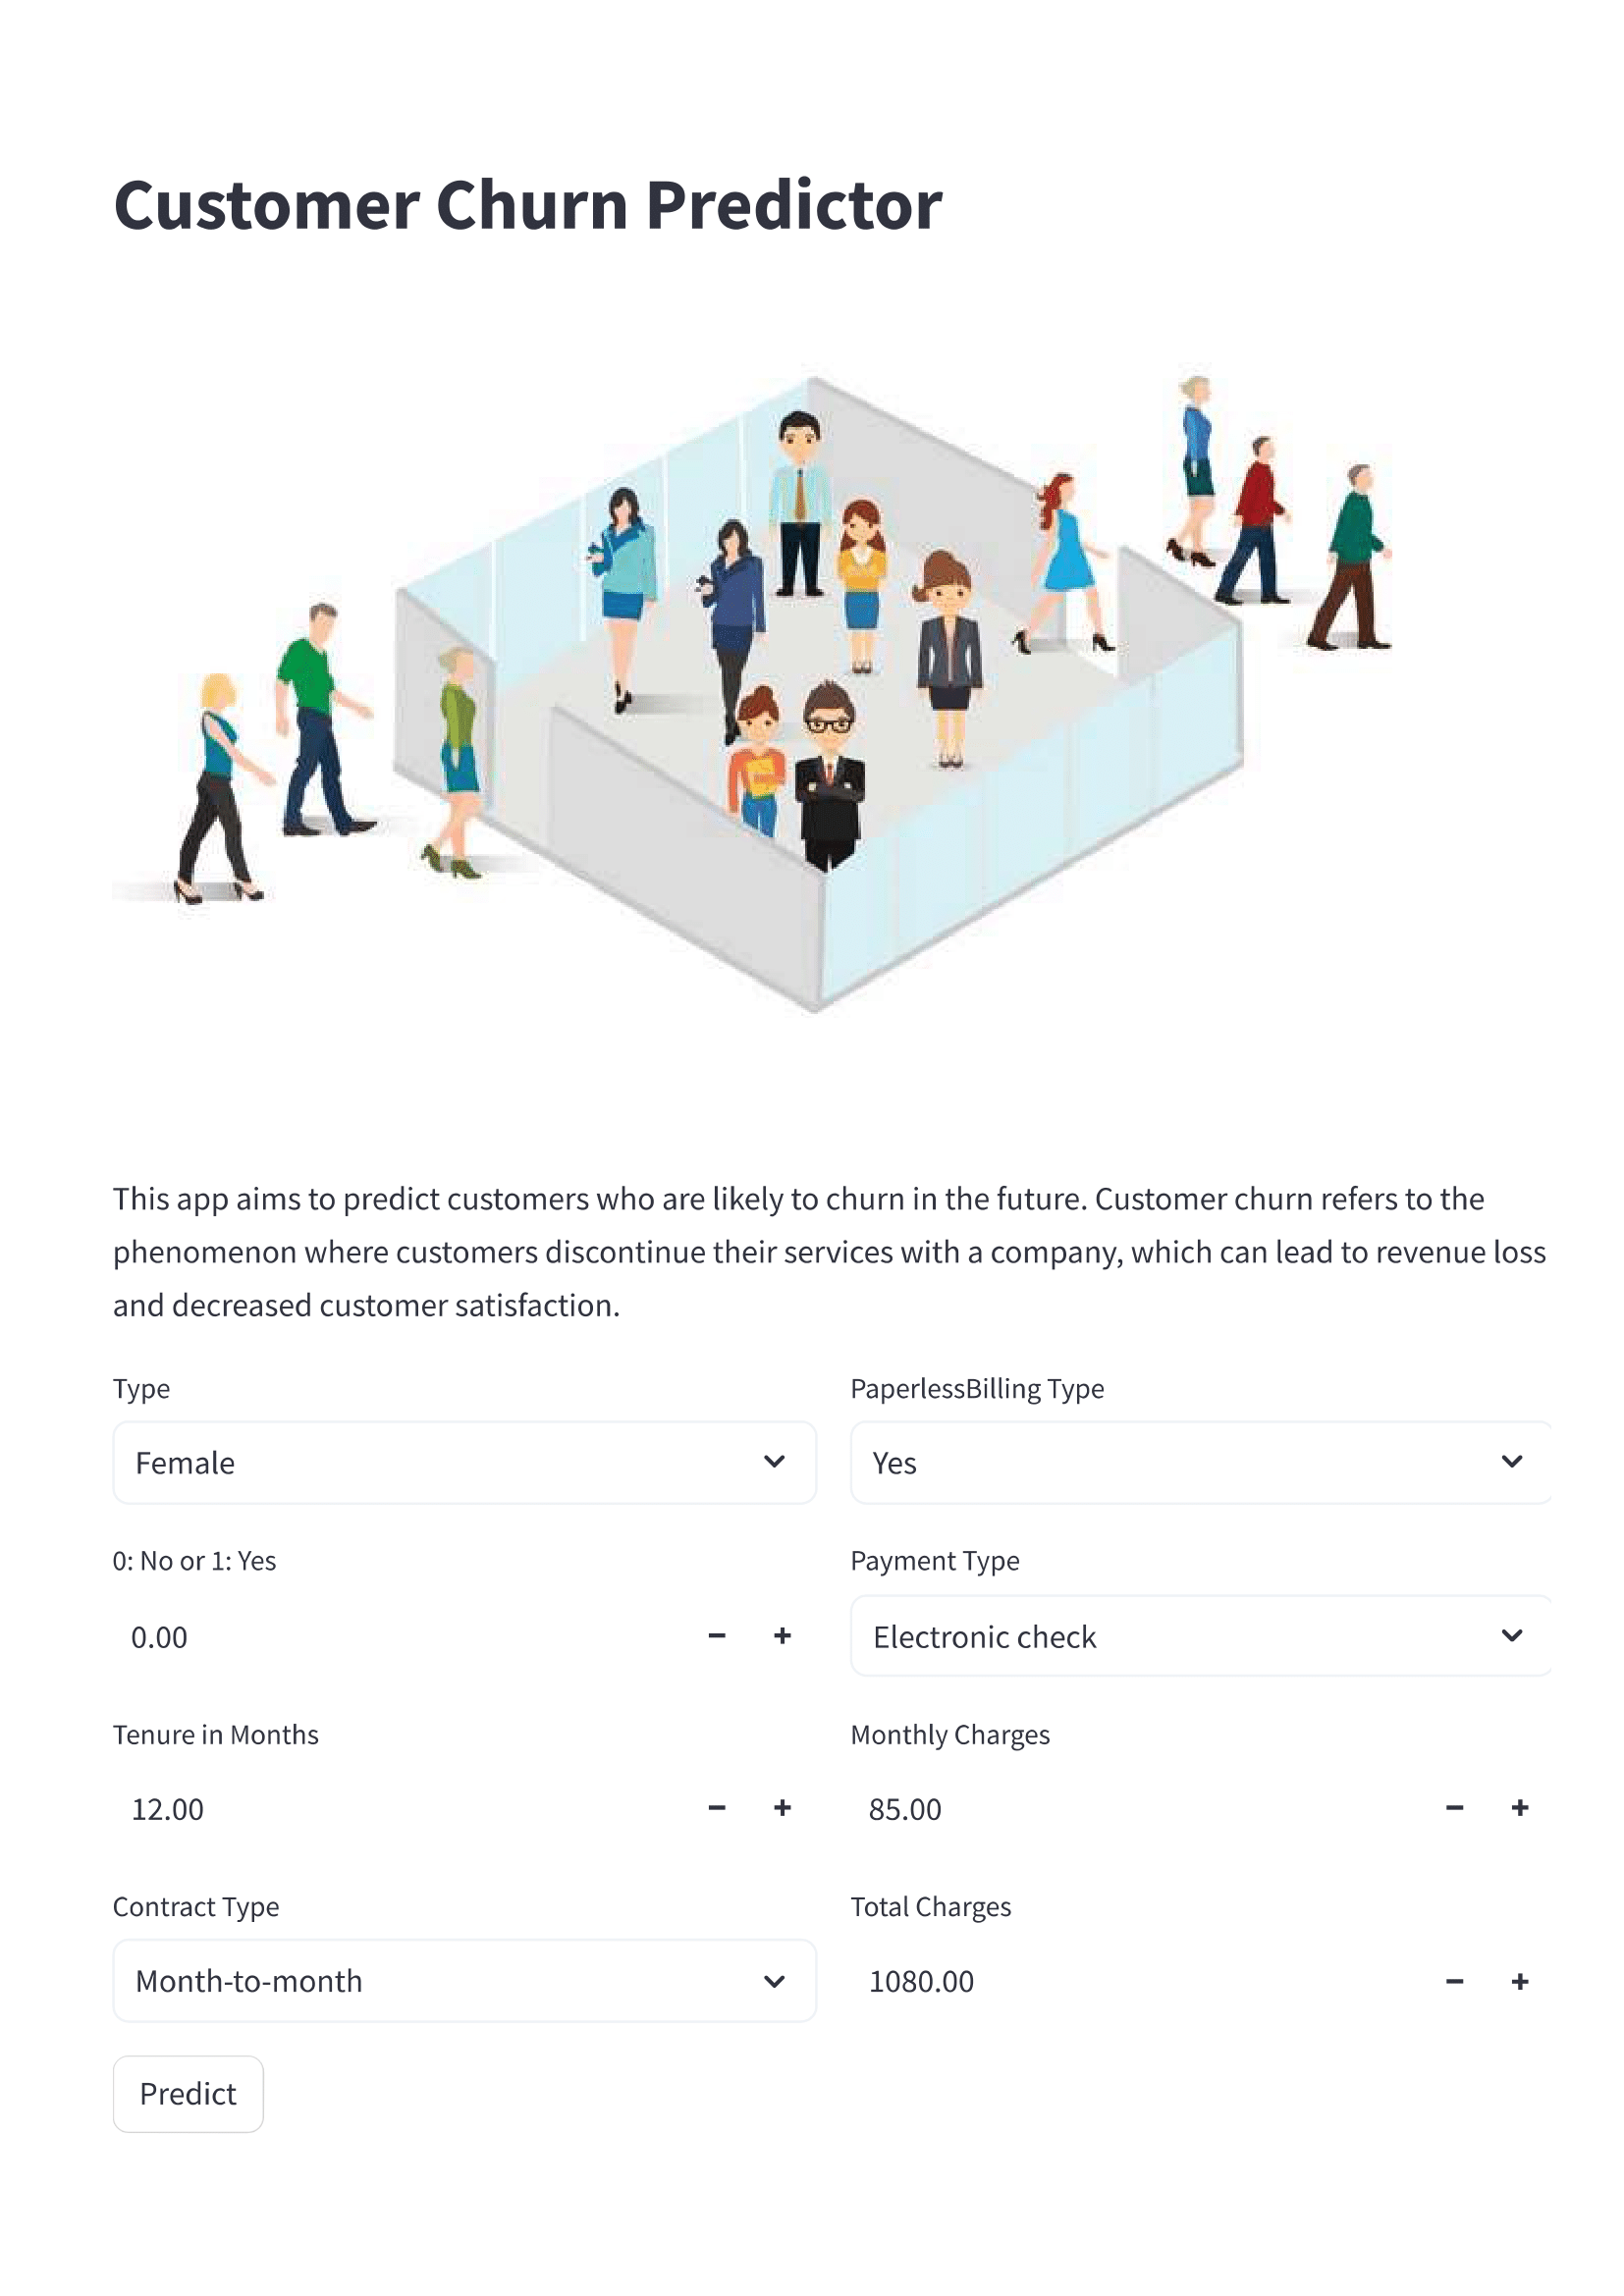

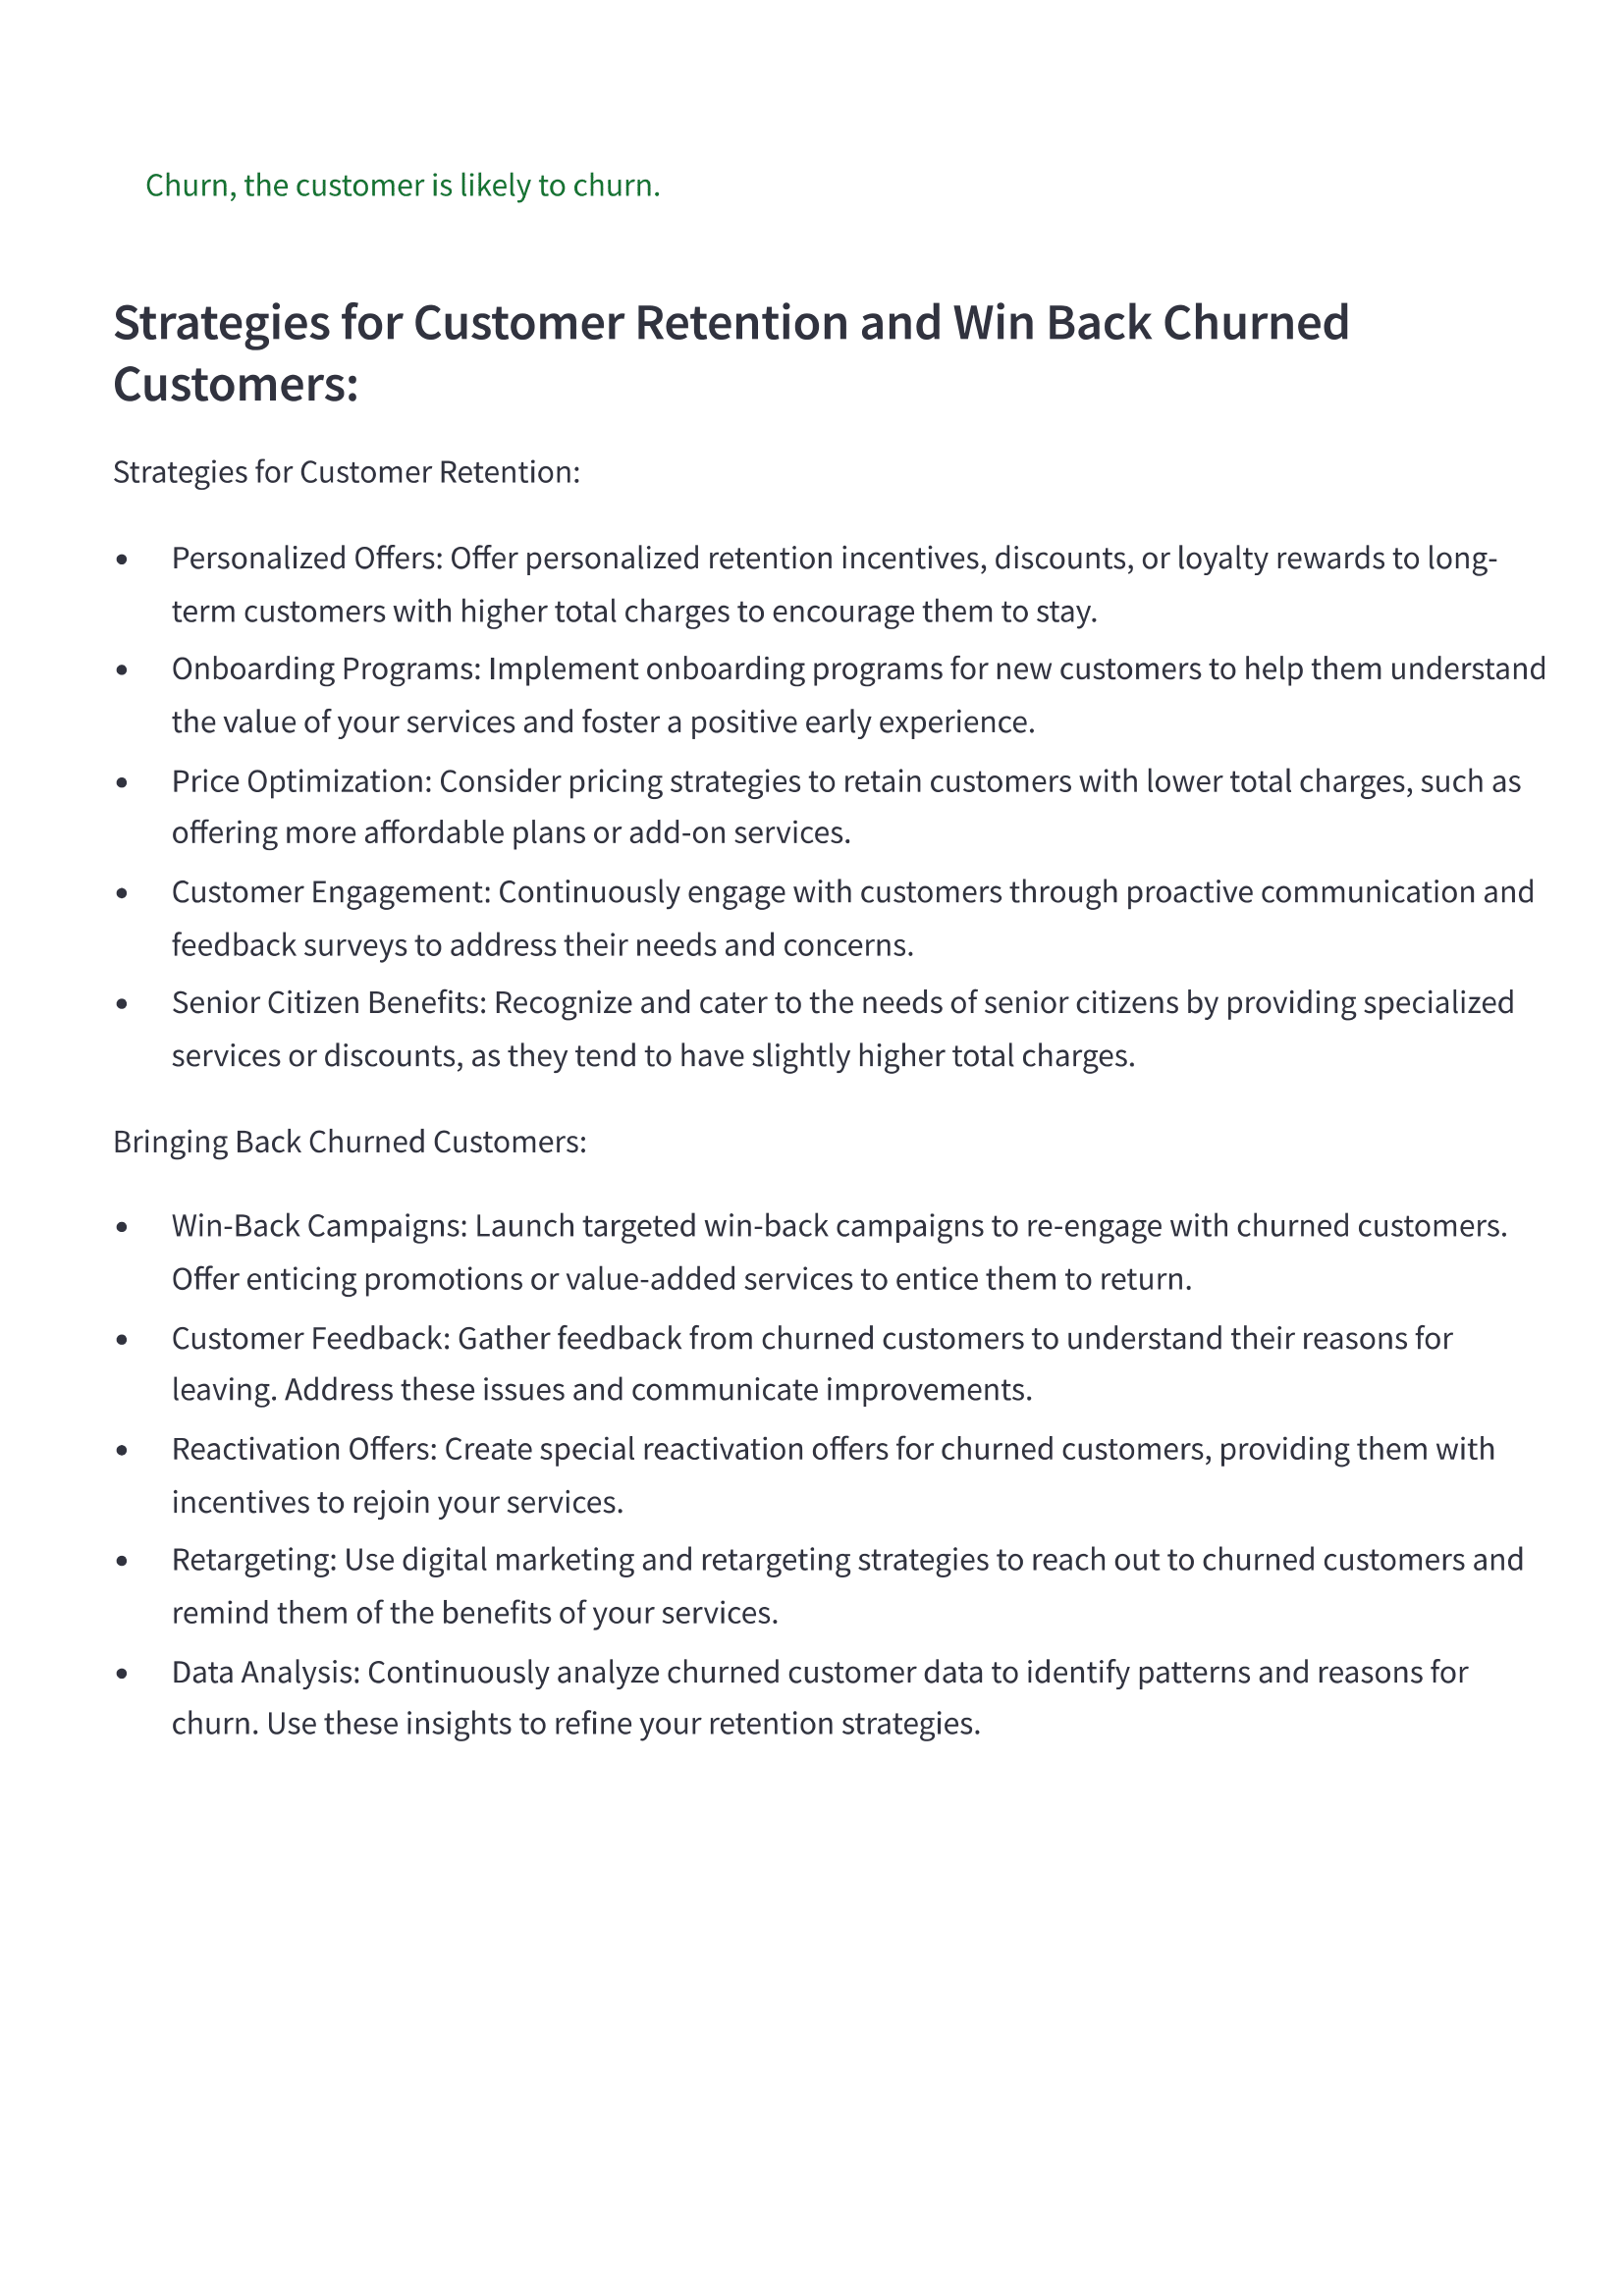